# Workplace

## Data Preprocessing

### Imputation below:

1. Filled all error data and missing data with `random data from 10 to 99`.
2. Adjust age less than 10 and greater than 99.
    - Handled the data with semantic error

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


Handle and analyse the raw data
Put percentage of ages into a dictionary, use the values of the dictionary as the weight of random

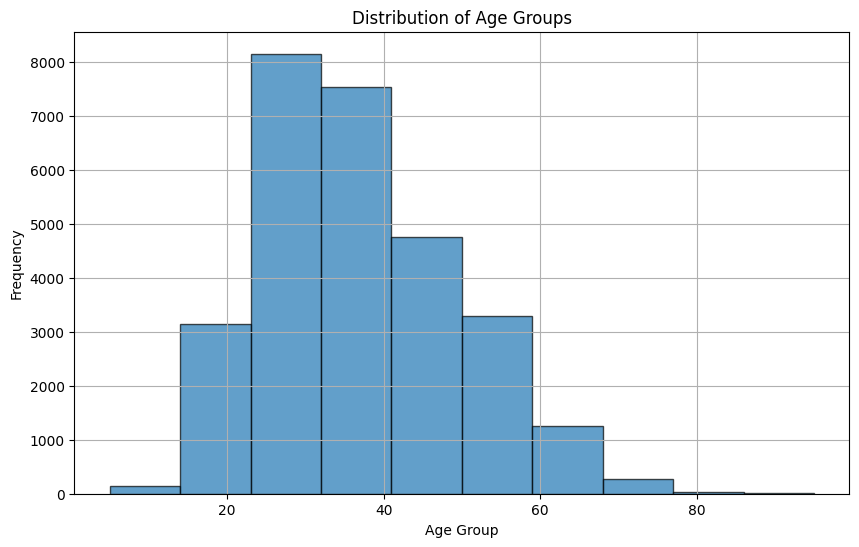

{25: 28.536440292502014, 35: 26.39865645008922, 45: 16.63692662957909, 55: 11.542633217872012, 15: 10.986319582939716, 65: 4.377033693712606, 75: 0.9376858752317974, 5: 0.47933942129386653, 85: 0.087470697316399, 95: 0.0174941394632798}


,User-ID,User-City,User-State,User-Country,User-Age,Age-Group
10419,59898,santa ana,california,"usa""",1.0,5
375,2152,grosse pointe,michigan,"usa""",1.0,5
41552,240214,harrodsburg,kentucky,"usa""",1.0,5
36826,213096,los angeles,california,"usa""",1.0,5
43921,253090,gatineau,quebec,"canada""",1.0,5
...,...,...,...,...,...,...
39011,225867,despair,indiana,"usa""",93.0,95
41730,241131,l.a.,california,"usa""",94.0,95
24739,142329,am sueden,n/a,"luxembourg""",96.0,95
19838,114865,croydon,victoria,"australia""",97.0,95


In [124]:
users_df_copy = pd.read_csv("BX-Users.csv")
users_df_copy.dropna(subset=["User-Age"], inplace=True)

users_df_copy["User-Age"] = pd.to_numeric(users_df_copy["User-Age"], errors="coerce")
users_df_copy.dropna(subset=["User-Age"], inplace=True)
users_df_copy = users_df_copy.loc[users_df_copy["User-Age"] < 100]
users_df_copy = users_df_copy.loc[users_df_copy["User-Age"] > 0]

# Define the bins of
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# lable all the bins
labels = [
    5,
    15,
    25,
    35,
    45,
    55,
    65,
    75,
    85,
    95,
]

users_df_copy["Age-Group"] = pd.cut(users_df_copy["User-Age"], bins=bins, labels=labels)
users_df_copy = users_df_copy.sort_values(by="User-Age", ascending=True)


plt.figure(figsize=(10, 6))
plt.hist(users_df_copy["Age-Group"], bins=len(labels), edgecolor="black", alpha=0.7)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Count the number of each age group
age_group_counts = users_df_copy["Age-Group"].value_counts()

# Calculate the age-group percentage
age_group_percentages = (age_group_counts / len(users_df_copy)) * 100
age_group_percentages_dict = age_group_percentages.to_dict()
print(age_group_percentages_dict)

users_df_copy

In [125]:
random_filled_ages = list(age_group_percentages_dict.keys())
total_percentage = sum(age_group_percentages_dict.values())
weights = [v / total_percentage for v in age_group_percentages_dict.values()]

In [126]:
users_df = pd.read_csv('BX-Users.csv')
rating_df = pd.read_csv("BX-Ratings.csv")
books_df = pd.read_csv('BX-Books.csv')

# Remove non-digit characters from 'User-Age' column
users_df["User-Age"] = users_df["User-Age"].str.replace(r"\D", "", regex=True)

# Convert 'User-Age' column to numeric
users_df["User-Age"] = pd.to_numeric(users_df["User-Age"], errors="coerce")

# Count the rows where user age is null
count_null_age = users_df["User-Age"].isnull().sum()

# Count the rows where user age is less than 10 and greater than 99
count_extreme_ages = ((users_df["User-Age"] < 10) | (users_df["User-Age"] > 99)).sum()

# Total number of rows with errored age or null
error_age_count = count_null_age + count_extreme_ages

# Generate a list of random numbers between 10 and 99
random.seed(42)
random_ages = []
for i in range(error_age_count):
    random_ages.append(np.random.choice(random_filled_ages, p=weights))
print(random_ages)

# Create a mask for rows where user age is null or falls outside the range [10, 99]
error_age_rows = (
    users_df["User-Age"].isnull()
    | (users_df["User-Age"] < 10)
    | (users_df["User-Age"] > 99)
)

# Extract the indexes of the rows that satisfy the condition
error_age_indexes = users_df.index[error_age_rows].tolist()

fill_age = {idx:ages for idx,ages in zip(error_age_indexes, random_ages)}

# Iterate over the fill_age dictionary and update the DataFrame
for idx, age in fill_age.items():
    users_df.loc[idx, "User-Age"] = age

[45, 55, 45, 35, 15, 55, 35, 35, 25, 35, 45, 45, 45, 25, 25, 25, 25, 25, 55, 15, 25, 35, 45, 15, 25, 25, 45, 35, 45, 45, 35, 15, 35, 15, 55, 45, 55, 35, 25, 35, 35, 45, 65, 25, 35, 35, 25, 25, 55, 65, 25, 35, 45, 45, 35, 45, 55, 45, 55, 45, 35, 45, 35, 45, 35, 35, 35, 25, 45, 15, 15, 35, 55, 45, 45, 45, 25, 55, 35, 15, 15, 25, 25, 15, 25, 25, 45, 35, 45, 35, 35, 25, 25, 25, 15, 55, 25, 55, 45, 25, 35, 55, 35, 45, 45, 25, 15, 45, 55, 15, 35, 45, 15, 55, 55, 35, 35, 35, 35, 55, 35, 25, 35, 25, 55, 65, 35, 35, 25, 35, 55, 45, 35, 25, 15, 45, 35, 35, 25, 25, 25, 15, 45, 55, 25, 55, 55, 25, 45, 45, 35, 35, 45, 45, 25, 35, 45, 35, 35, 25, 35, 35, 45, 25, 55, 45, 45, 65, 35, 15, 45, 35, 35, 45, 25, 35, 35, 15, 55, 65, 25, 35, 55, 25, 25, 25, 35, 35, 45, 35, 25, 25, 45, 35, 45, 25, 25, 35, 25, 35, 55, 35, 55, 35, 35, 35, 35, 25, 25, 35, 25, 55, 35, 75, 25, 35, 35, 55, 35, 15, 55, 35, 25, 25, 25, 45, 35, 35, 35, 35, 55, 55, 15, 25, 35, 35, 25, 15, 35, 35, 15, 55, 55, 55, 45, 25, 35, 15, 35, 35,

Fill missing data of nationalitys with `random` as well.

In [127]:
# List all the countries in the data
country_list = list(users_df["User-Country"].dropna().unique())

# List row indexes where User-Country is null
nan_indexes = list(users_df["User-Country"][users_df["User-Country"].isnull()].index)

# Count total number of rows with null
count_nan = len(nan_indexes)

# Generate random countries for all null rows
random.seed(42)
random_countries = [random.choice(country_list) for _ in range(count_nan)]

fill_country = {idx:countries for idx,countries in zip(nan_indexes, random_countries)}

# Fill gaps in User-Country column
users_df["User-Country"] = users_df["User-Country"].fillna(fill_country)
users_df

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",45.0
1,9,germantown,tennessee,"usa""",55.0
2,16,albuquerque,new mexico,"usa""",45.0
3,17,chesapeake,virginia,"usa""",35.0
4,19,weston,,"barbados""",14.0
...,...,...,...,...,...
48294,278846,toronto,ontario,"canada""",23.0
48295,278849,georgetown,ontario,"canada""",23.0
48296,278851,dallas,texas,"usa""",33.0
48297,278852,brisbane,queensland,"australia""",32.0


Check the distribution of raw data, draft below

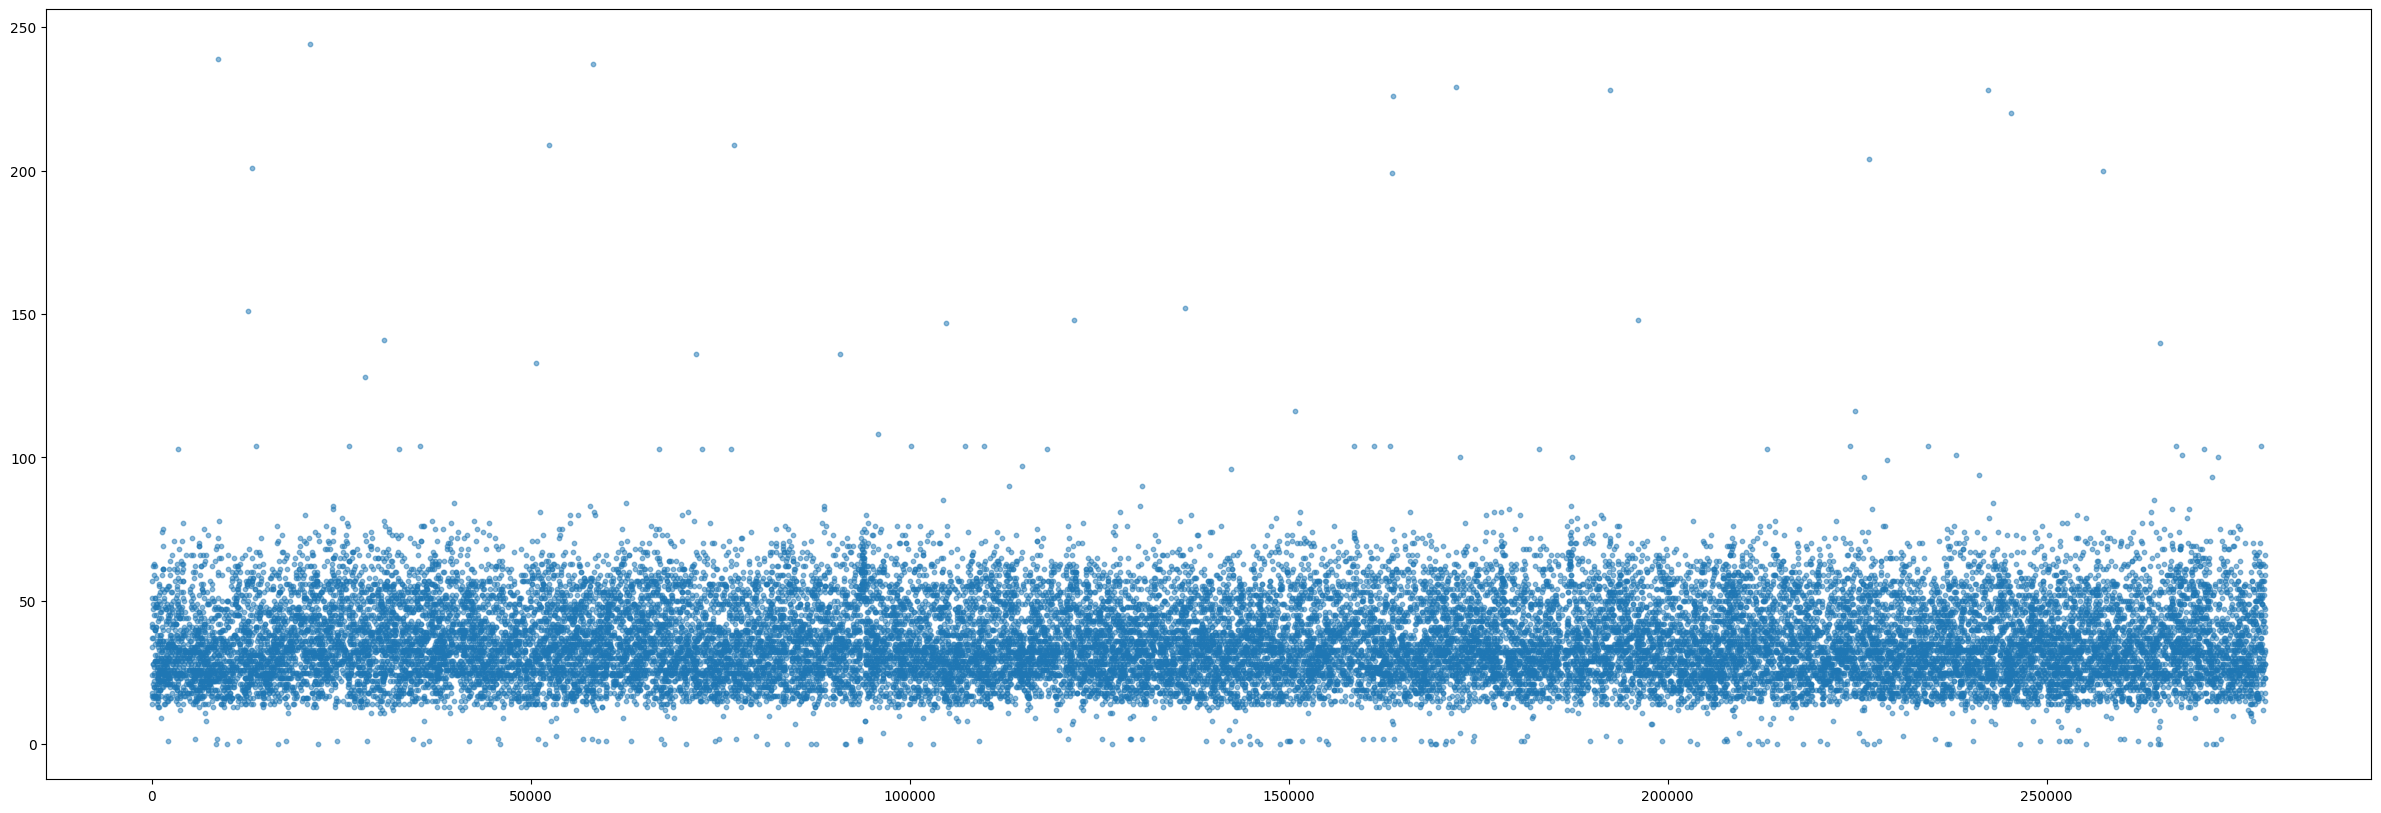

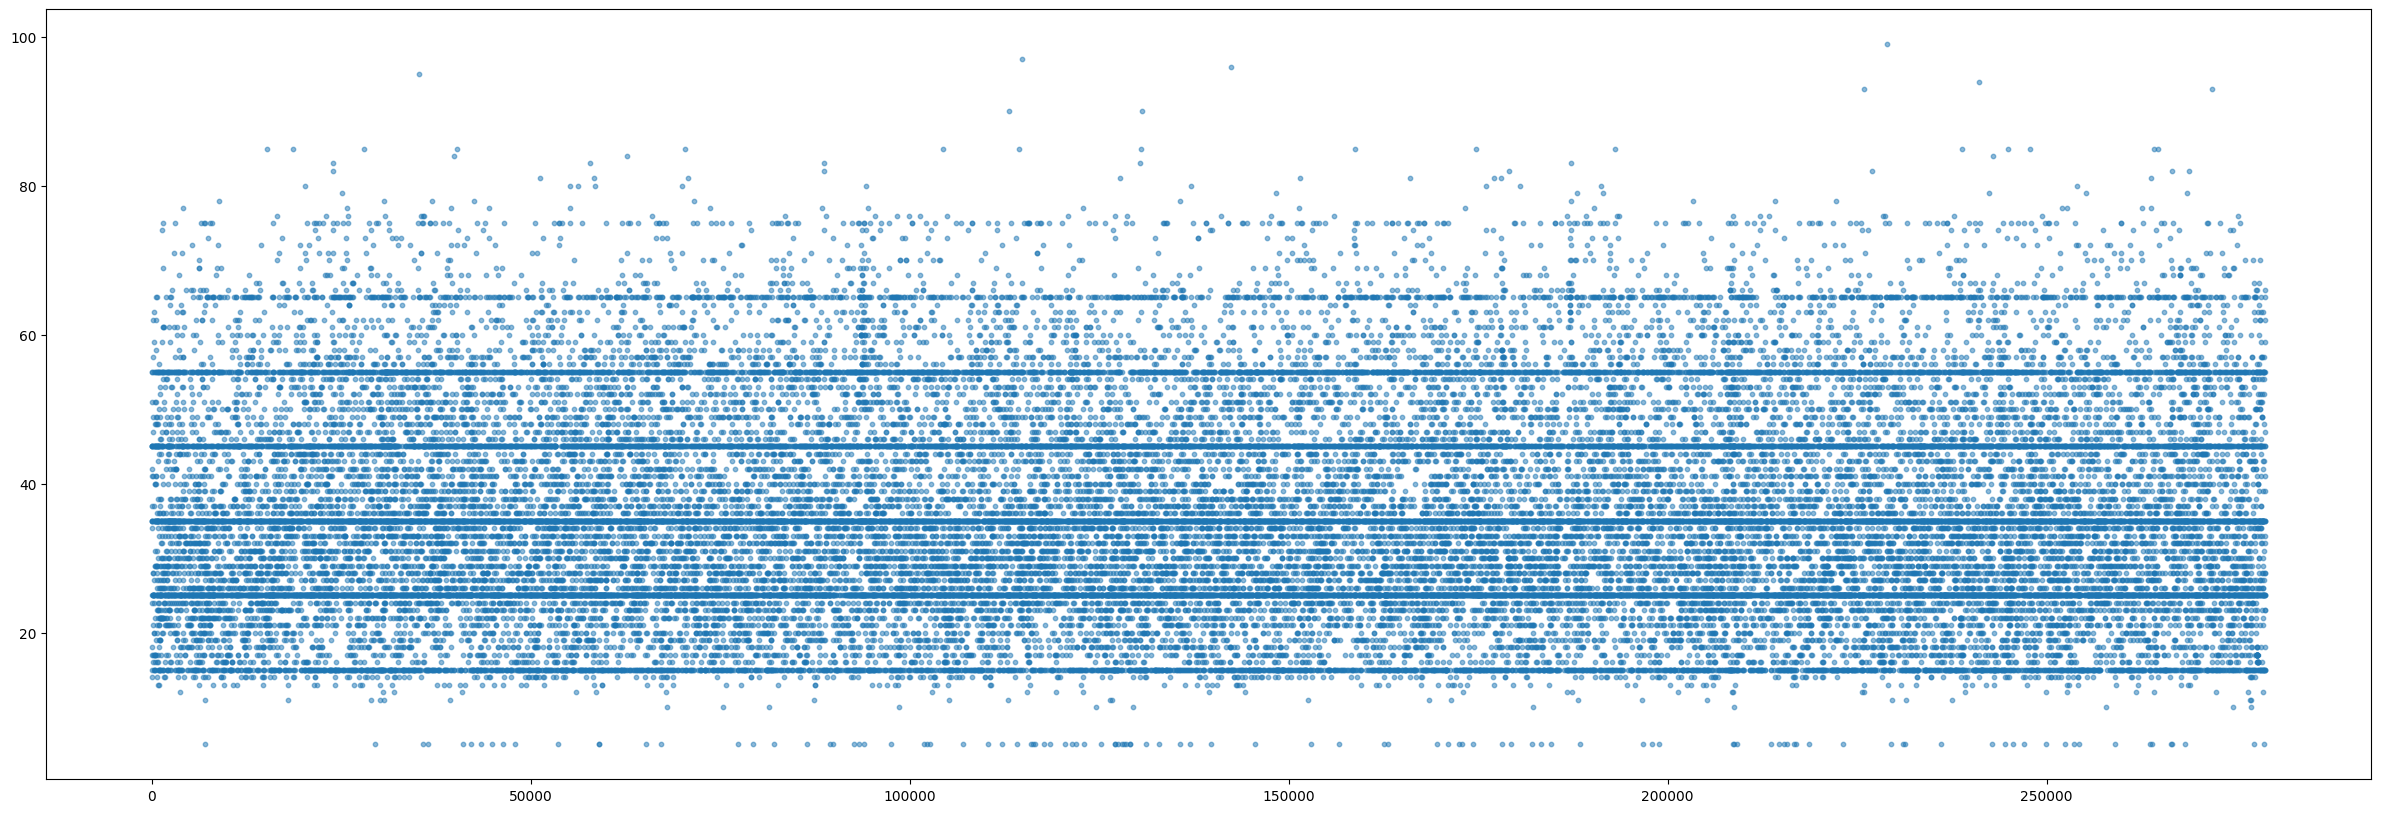

In [128]:
books_cp = pd.read_csv("BX-Users.csv")

# Remove non-digit characters from 'User-Age' column
books_cp["User-Age"] = books_cp["User-Age"].str.replace(r"\D", "", regex=True)

# Convert 'User-Age' column to numeric
books_cp["User-Age"] = pd.to_numeric(books_cp["User-Age"], errors="coerce")

plt.figure(figsize=(30, 10))
plt.scatter(x=books_cp["User-ID"], y=books_cp["User-Age"], s=10, alpha=0.5)
plt.show()

plt.figure(figsize=(30, 10))
plt.scatter(x=users_df["User-ID"], y=users_df["User-Age"], s=10, alpha=0.5)
plt.show()

## Discretising below

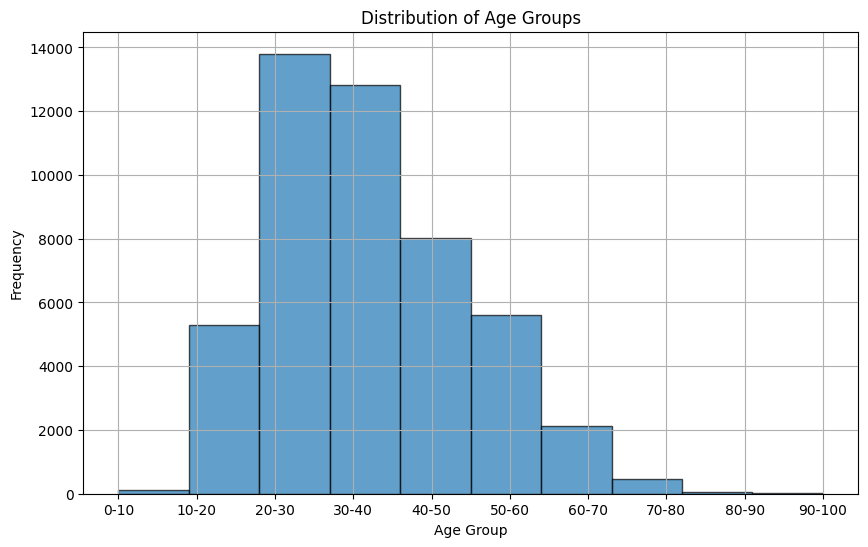

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group
37474,216915,clovis,california,"usa""",5.0,0-10
6273,36398,portland,oregon,"usa""",5.0,0-10
1205,7078,brookline,new hampshire,"usa""",5.0,0-10
23071,132913,toronto,ontario,"canada""",5.0,0-10
45707,263692,chagrin falls,ohio,"usa""",5.0,0-10
...,...,...,...,...,...,...
41730,241131,l.a.,california,"usa""",94.0,90-100
6065,35257,arlington,texas,"usa""",95.0,90-100
24739,142329,am sueden,n/a,"luxembourg""",96.0,90-100
19838,114865,croydon,victoria,"australia""",97.0,90-100


In [129]:
# Define the bins of
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# lable all the bins
labels = [
    "0-10",
    "10-20",
    "20-30",
    "30-40",
    "40-50",
    "50-60",
    "60-70",
    "70-80",
    "80-90",
    "90-100",
]

# Discretise the data
users_df["Age-Group"] = pd.cut(users_df["User-Age"], bins=bins, labels=labels)
users_df = users_df.sort_values(by="User-Age", ascending=True)

# Make a histogram to show the distribution of all discretised data
plt.figure(figsize=(10, 6))
plt.hist(users_df["Age-Group"], bins=len(labels), edgecolor="black", alpha=0.7)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



users_df

Connect Users and Their ratings together, draw a scatter plot to analyse the distribution of age vs rating

In [122]:
merged_df = pd.merge(users_df, rating_df, on="User-ID", how="inner")

merged_df

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating
0,107408,austin,texas,"usa""",5.0,0-10,0380791854,9
1,222546,eau claire,wisconsin,"usa""",5.0,0-10,0743453484,7
2,59514,jacksonville,florida,"usa""",5.0,0-10,0385496095,7
3,232587,west chester,pennsylvania,"usa""",5.0,0-10,0688156134,7
4,184272,wyoming,michigan,"usa""",5.0,0-10,0517580497,10
...,...,...,...,...,...,...,...,...
204159,114865,croydon,victoria,"australia""",97.0,90-100,0553271067,10
204160,114865,croydon,victoria,"australia""",97.0,90-100,0749309423,9
204161,228990,private,michigan,"usa""",99.0,90-100,0425122123,7
204162,228990,private,michigan,"usa""",99.0,90-100,044022165X,8
